In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from utils import plot_2d, plot_classifier_boundary

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<h2>MLP vs Logistic Regression</h2>

<h2>MLP vs kNN</h2>

kNN performing better

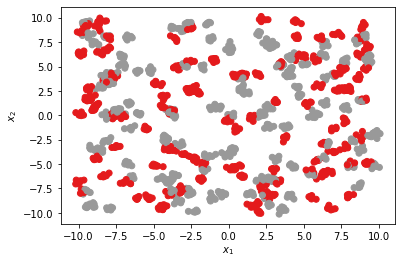

In [2]:
def g_knn():
    X, y = datasets.make_blobs(
        n_samples=1500,
        n_features=2,
        centers=220,
        cluster_std=.16,
        random_state=42
    )
    y = y % 2 # to reduce the amount of different labels to 2
    return X, y
    
knn_X, knn_y = g_knn()
plot_2d(knn_X, knn_y)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(knn_X, knn_y, test_size=.33, random_state=42)

kNN score: 91.52


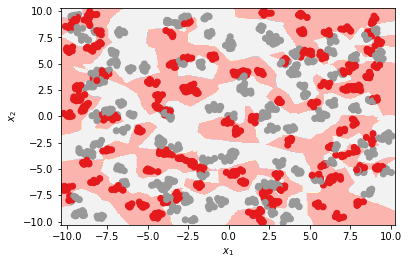

In [4]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
print('kNN score: %.2f' % (knn.score(X_test, y_test) * 100))

plot_classifier_boundary(knn, knn_X, knn_y)

MLP score: 63.03


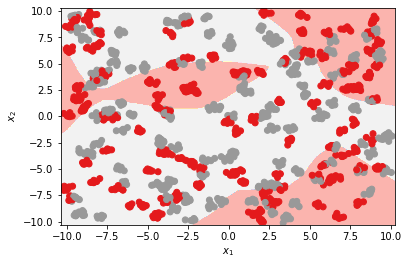

In [5]:
sc = StandardScaler().fit(X_train)
sc_X_train = sc.transform(X_train)
sc_X_test = sc.transform(X_test)

mlp = MLPClassifier(
    hidden_layer_sizes=(50, 80, 80, 25),
    activation='relu',
    solver='adam',
    max_iter=3000,
    random_state=42
).fit(sc_X_train, y_train)
print('MLP score: %.2f' % (mlp.score(sc_X_test, y_test) * 100))

plot_classifier_boundary(mlp, knn_X, knn_y, sc)

mlp performing better

(1000, 8)


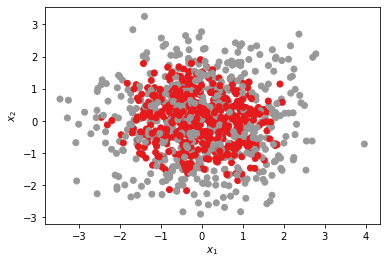

In [6]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

def g_mlp():
    return datasets.make_gaussian_quantiles(
        n_samples=1000,
        n_features=8,
        n_classes=2,
        random_state=42
    )

mlp_X, mlp_y = g_mlp()
print(mlp_X.shape)
plot_2d(mlp_X, mlp_y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(mlp_X, mlp_y, test_size=.33, random_state=42)

In [8]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
print('kNN score: %.2f' % (knn.score(X_test, y_test) * 100))

#plot_classifier_boundary(knn, mlp_X, mlp_y)

kNN score: 63.94


In [9]:
sc = StandardScaler().fit(X_train)
sc_X_train = sc.transform(X_train)
sc_X_test = sc.transform(X_test)

mlp = MLPClassifier(
    hidden_layer_sizes=(512, 512, 256, 16),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
).fit(sc_X_train, y_train)
print('MLP score: %.2f' % (mlp.score(sc_X_test, y_test) * 100))

#plot_classifier_boundary(mlp, mlp_X, mlp_y, sc)

MLP score: 93.33
